# hw7

In [90]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

1. 给定dataframe df=pd.DataFrame({"vals": np.random.RandomState(31).randint(-30, 30, size=15), "grps": np.random.RandomState(31).choice(["A", "B"], 15)})
给df新增一列patched_vals, 如果vals相应行非负，则patched_vals等于vals，否则等于组平均值(按照grps分组)。

In [91]:
df=pd.DataFrame({"vals": np.random.RandomState(31).randint(-30, 30, size=15), "grps": np.random.RandomState(31).choice(["A", "B"], 15)})
df


,vals,grps
0,-12,A
1,-7,B
2,-14,A
3,4,A
4,-7,A
5,28,B
6,-2,A
7,-1,A
8,8,A
9,-2,B


In [92]:
grouped_mean=df.groupby('grps')['vals'].mean()
grouped_mean

grps
A   -0.333333
B    6.333333
Name: vals, dtype: float64

In [93]:

df['patched_vals']=df.apply(
    lambda row:row['vals'] if row['vals']>=0 else grouped_mean[row['grps']],
    axis=1
)
df

,vals,grps,patched_vals
0,-12,A,-0.333333
1,-7,B,6.333333
2,-14,A,-0.333333
3,4,A,4.000000
4,-7,A,-0.333333
5,28,B,28.000000
6,-2,A,-0.333333
7,-1,A,-0.333333
8,8,A,8.000000
9,-2,B,6.333333


2.使用iris

In [94]:
iris=pd.read_csv('iris.csv')
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


/tmp/ipykernel_33293/1960644869.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count_iris=sns.countplot(x='variety',data=iris,color='yellow',palette="mako")


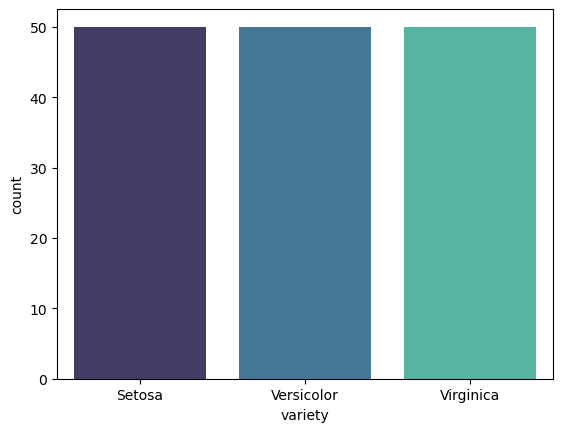

In [95]:
count_iris=sns.countplot(x='variety',data=iris,color='yellow',palette="mako")

<Axes: >

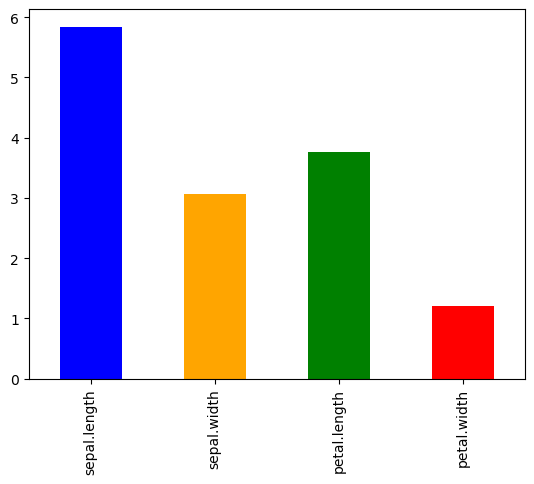

In [96]:
iris.select_dtypes('number').mean().plot(kind='bar',color=['blue','orange','green','red'])

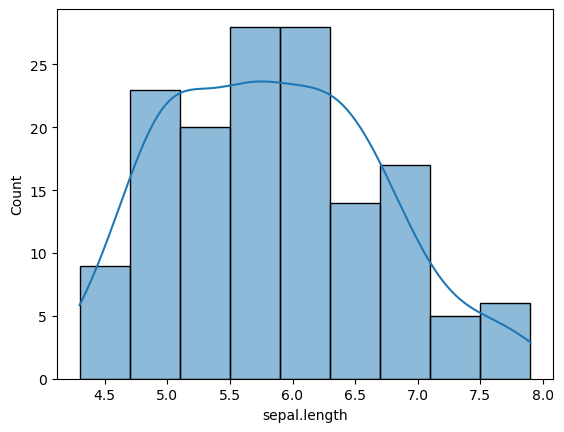

In [97]:
kde_iris=sns.histplot(data=iris,x='sepal.length',kde=True)

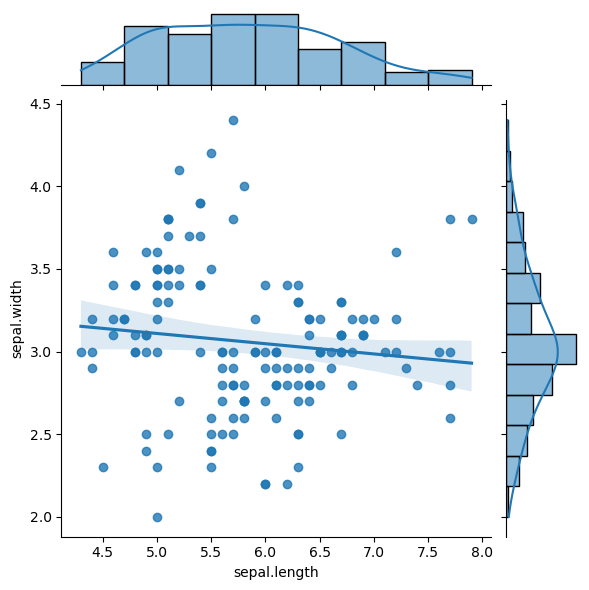

In [98]:
joint_iris = sns.jointplot(
    data=iris,
    x="sepal.length",
    y="sepal.width",
    kind="reg",
    marginal_kws={"kde": True},
)


/tmp/ipykernel_33293/1119694237.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box1_iris=sns.boxplot(


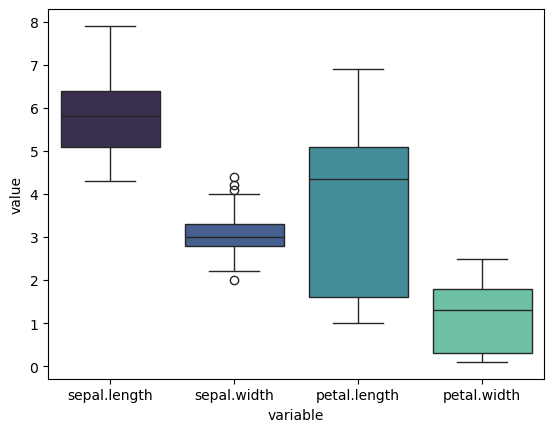

In [99]:
box1_iris=sns.boxplot(
    data=iris.copy().drop(['variety'],axis=1).melt(),
    x='variable',
    y='value',
    palette="mako"
)

/tmp/ipykernel_33293/1204383158.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box2_iris=sns.boxplot(


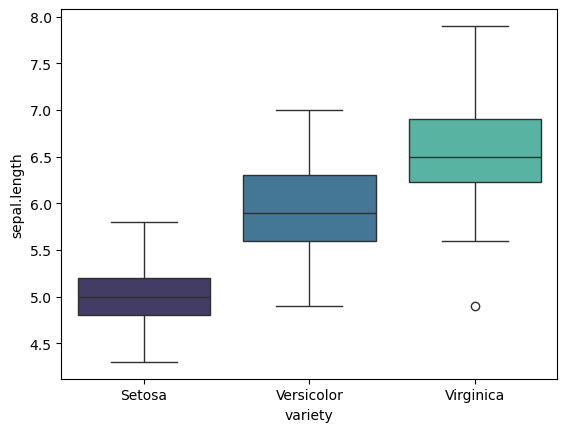

In [100]:
box2_iris=sns.boxplot(
    data=iris,
    x='variety',
    y='sepal.length',
    palette="mako"
)

/tmp/ipykernel_33293/3650403071.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.violinplot(


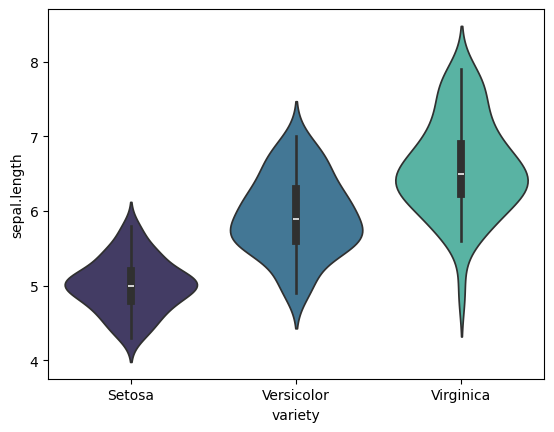

In [101]:
violin_iris,ax=plt.subplots()
ax=sns.violinplot(
    data=iris,
    x='variety',
    y='sepal.length',
    palette="mako"
)

3. 读入gapminder.csv文件，并创建以下图形：

a) 请画图来显示人均gpd与期望寿命之间的关系，分别使用全部数据，一个洲和一个国家（例如中国）来展示

b) 请在一张图上显示各个洲平均期望寿命随时间的变化图

c) 请给出不同洲期望寿命和人均GDP的分布

注：iris和gapminder数据集请在作业文件夹中下载，由于seaborn版本不同，不要求图形完全一致。

In [102]:
gap=pd.read_csv('gapminder.csv')
gap

,Unnamed: 0,country,continent,year,lifeExp,pop,gdpPercap
0,1,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,2,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,3,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,4,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,5,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...,...
1699,1700,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,1701,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,1702,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,1703,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [103]:
gap_china=gap[gap['country']=='China']
gap_china

,Unnamed: 0,country,continent,year,lifeExp,pop,gdpPercap
288,289,China,Asia,1952,44.00000,556263527,400.448611
289,290,China,Asia,1957,50.54896,637408000,575.987001
290,291,China,Asia,1962,44.50136,665770000,487.674018
291,292,China,Asia,1967,58.38112,754550000,612.705693
292,293,China,Asia,1972,63.11888,862030000,676.900092
293,294,China,Asia,1977,63.96736,943455000,741.237470
294,295,China,Asia,1982,65.52500,1000281000,962.421381
295,296,China,Asia,1987,67.27400,1084035000,1378.904018
296,297,China,Asia,1992,68.69000,1164970000,1655.784158
297,298,China,Asia,1997,70.42600,1230075000,2289.234136


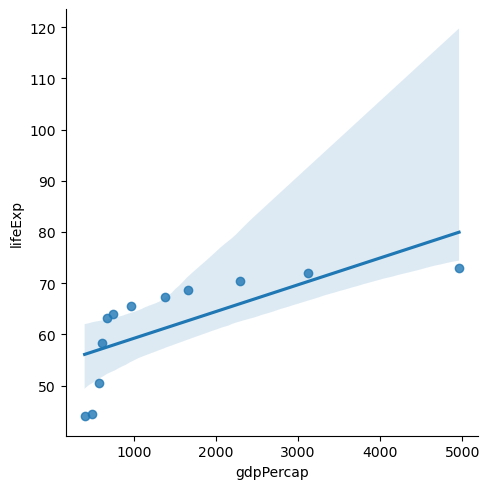

In [104]:
gdp_life=sns.lmplot(
    data=gap_china,
    x='gdpPercap',
    y='lifeExp'
)

In [105]:
gap['continent'].value_counts()

continent
Africa      624
Asia        396
Europe      360
Americas    300
Oceania      24
Name: count, dtype: int64

In [106]:
gap_year=gap.groupby(['continent','year'])['lifeExp'].mean().reset_index()

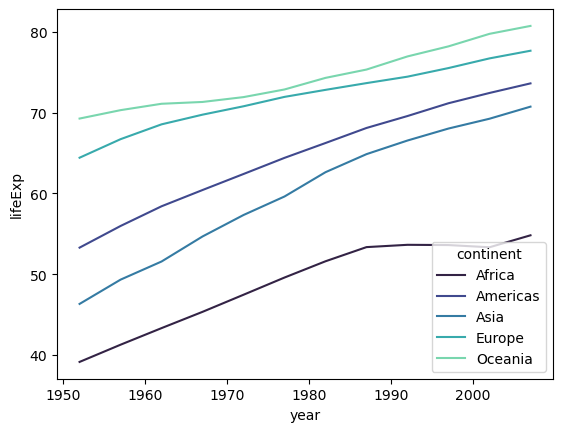

In [107]:
gap_year_fig=sns.lineplot(
    data=gap_year,
    x='year',
    y='lifeExp',
    hue='continent',
    palette="mako"
)

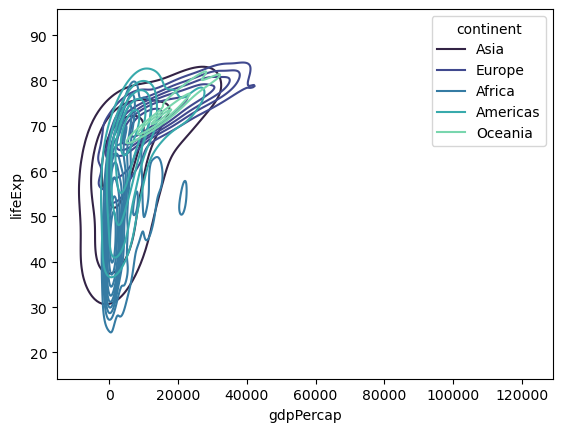

In [108]:
gap_gdp_fig=sns.kdeplot(
    data=gap,
    x='gdpPercap',
    y='lifeExp',
    hue='continent',
    palette="mako"
)

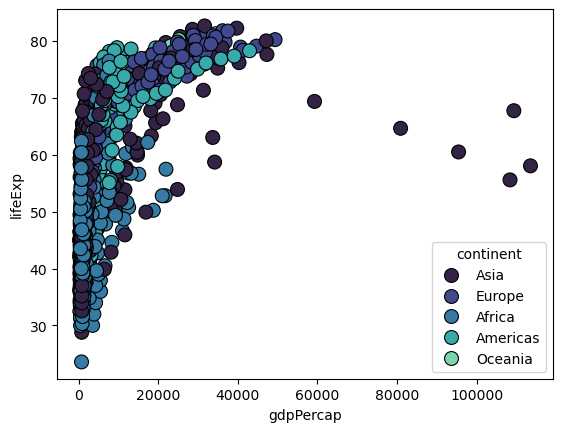

In [109]:
gap_gdp_scatter=sns.scatterplot(x="gdpPercap", y="lifeExp", data=gap, hue="continent", palette="mako", s=100, edgecolor="black")